In [1]:
# %%capture
#!pip install -r ../requirements.txt

In [2]:
import torch
from PIL import Image, ImageDraw
from utils import maximal_rectangle, resize_and_reposition
from florence_detection import florence_inference_region
from utils import CanvasTemplate
import matplotlib.pyplot as plt

In [3]:
# input
region_detection_method = ["grad_cam", "florence2"]
input_images_list = ["../input/ad_2.jpg", "../input/ad_3.webp"]
captions = {
    0: [
        "get the latest fashion trend",
        "Perfect shoes for every occasion",
        "cap on the head",
    ],
    1: ["Don't stop play", "Drink more, Drink better", "Master Chief"],
}
canvas_templates = [
    CanvasTemplate(
        canvas_size=((0, 0), (1024, 1024)),
        elements=[((0, 0), (1024, 300)), ((720, 0), (1024, 1024))],
    ),
    CanvasTemplate(
        canvas_size=((0, 0), (512, 512)),
        elements=[((0, 0), (512, 150)), ((200, 0), (512, 512))],
    ),
    CanvasTemplate(
        canvas_size=((0, 0), (1024, 1024)),
        elements=[
            ((0, 0), (1024, 200)),
            ((0, 0), (200, 1024)),
            ((820, 0), (1024, 1024)),
            ((0, 820), (1024, 1024)),
        ],
    ),
]
# parameters
clip_arch = "RN50"
saliency_layer = "layer4"
blur = False
device = "cuda" if torch.cuda.is_available() else "cpu"

image: ../input/ad_2.jpg, caption: get the latest fashion trend


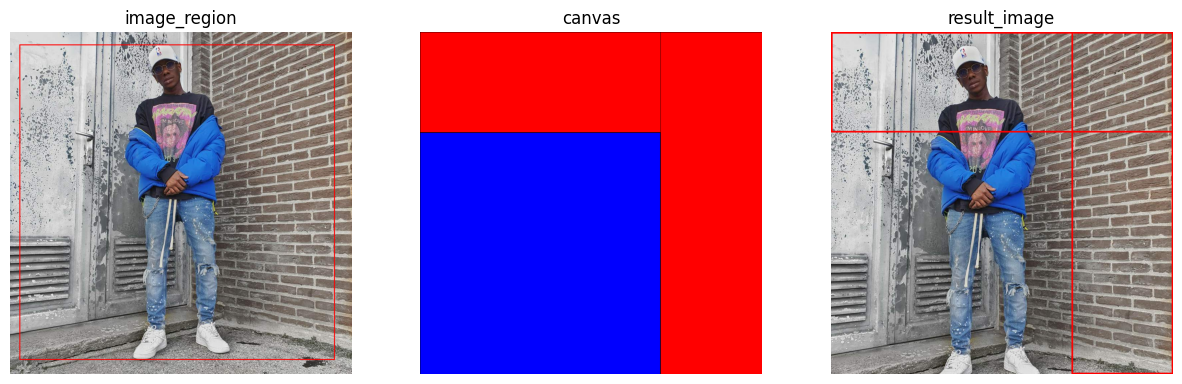

image: ../input/ad_2.jpg, caption: get the latest fashion trend


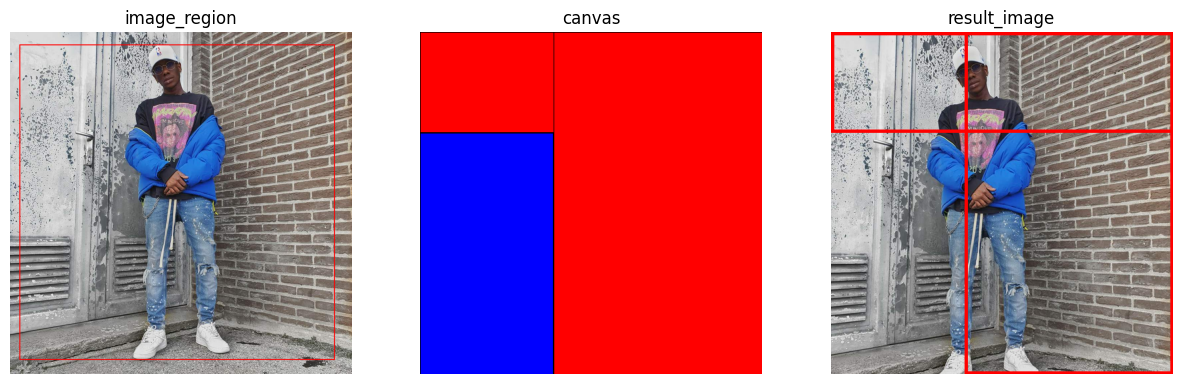

image: ../input/ad_2.jpg, caption: get the latest fashion trend


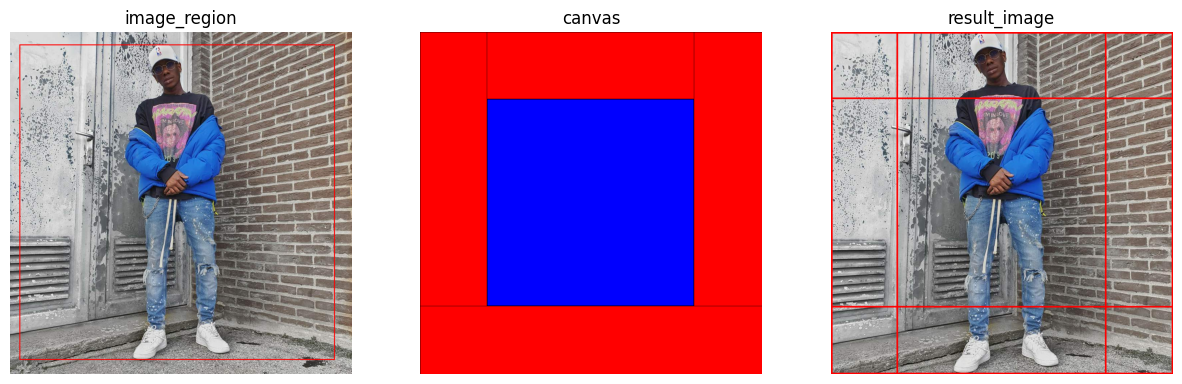

image: ../input/ad_2.jpg, caption: Perfect shoes for every occasion


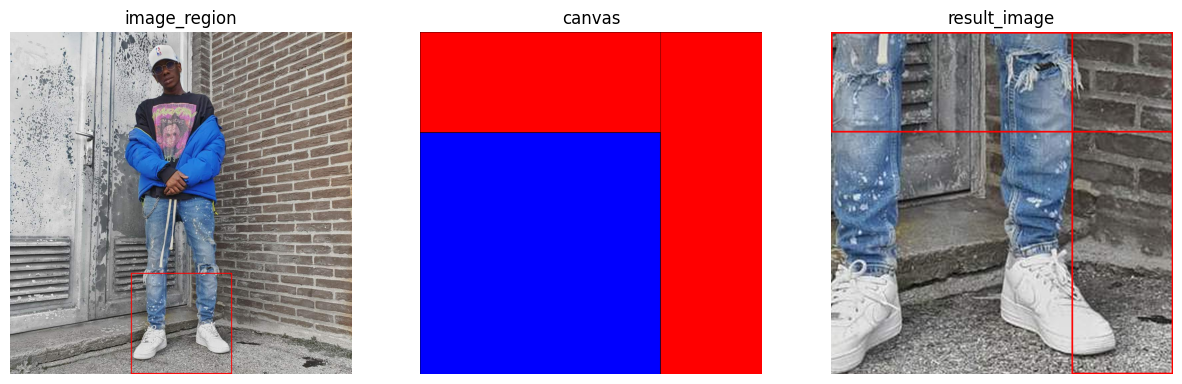

image: ../input/ad_2.jpg, caption: Perfect shoes for every occasion


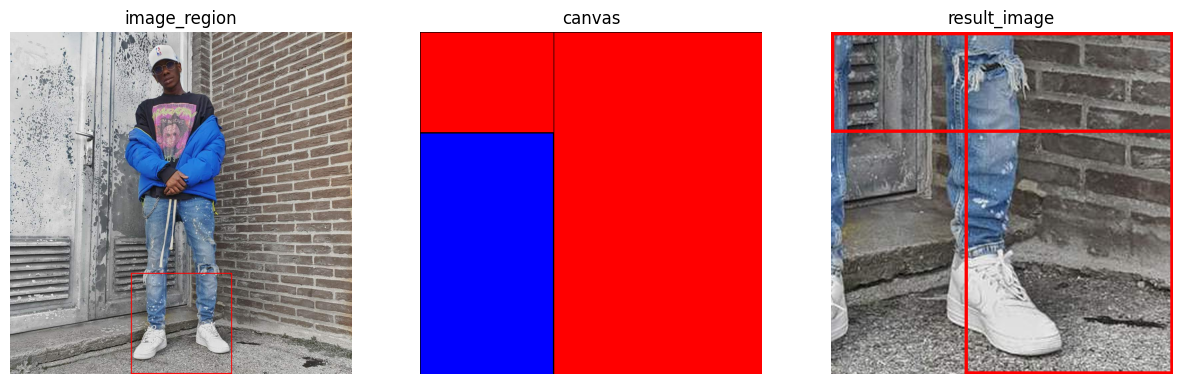

image: ../input/ad_2.jpg, caption: Perfect shoes for every occasion


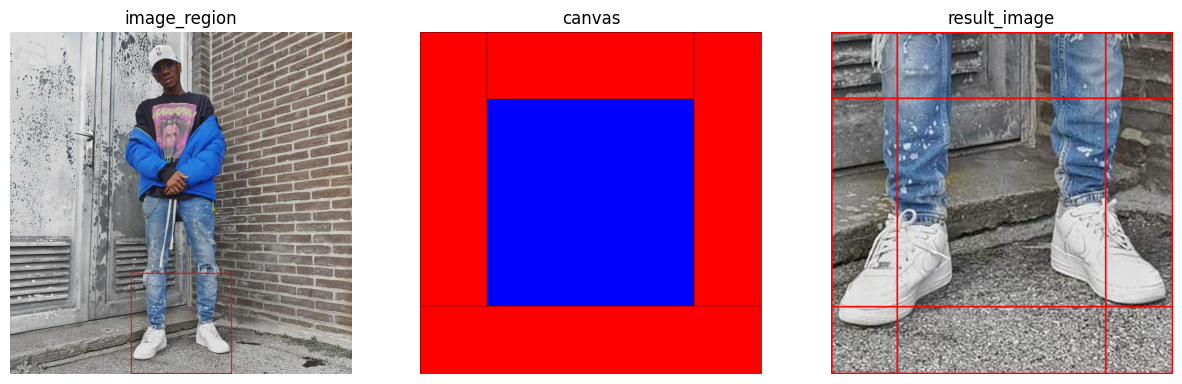

image: ../input/ad_2.jpg, caption: cap on the head


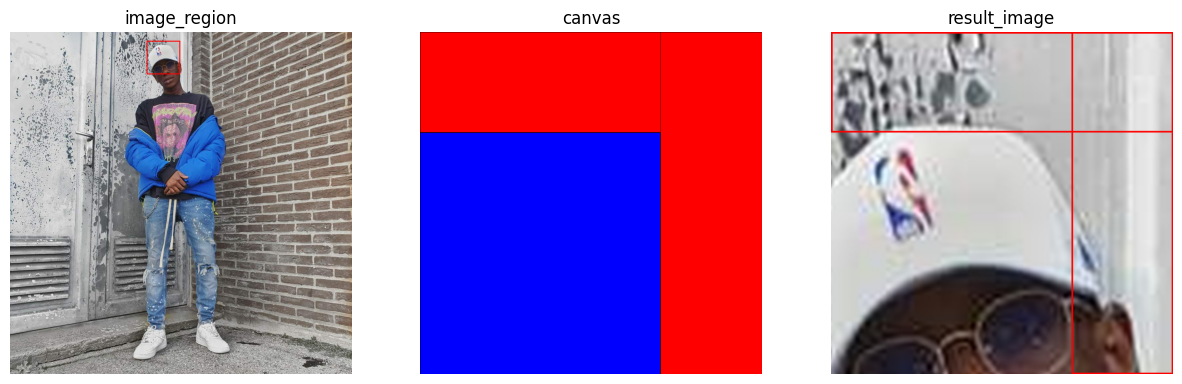

image: ../input/ad_2.jpg, caption: cap on the head


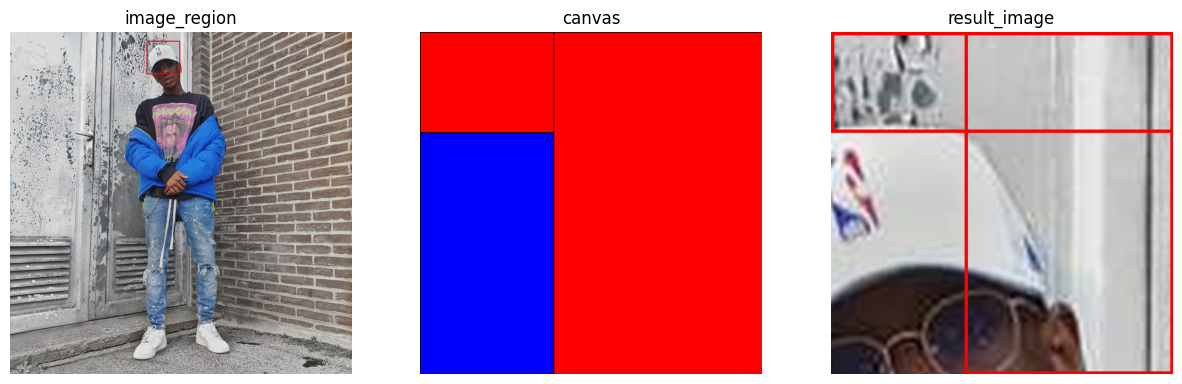

image: ../input/ad_2.jpg, caption: cap on the head


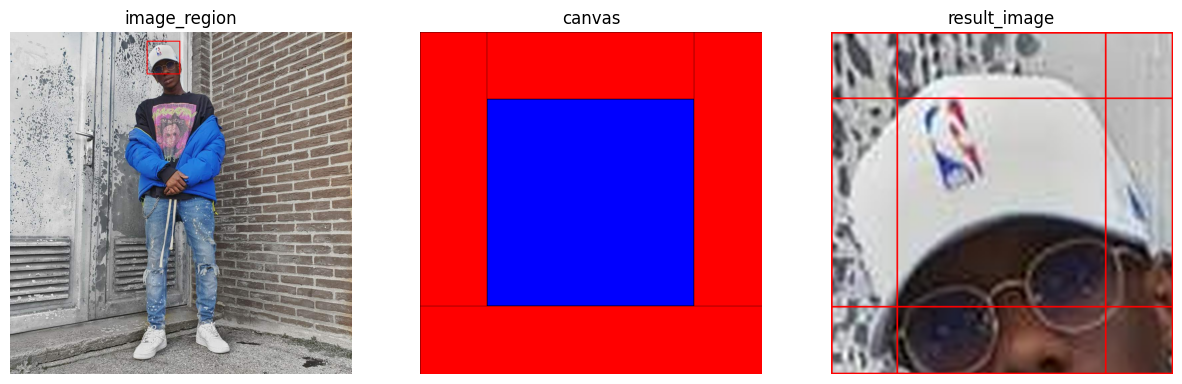

image: ../input/ad_3.webp, caption: Don't stop play


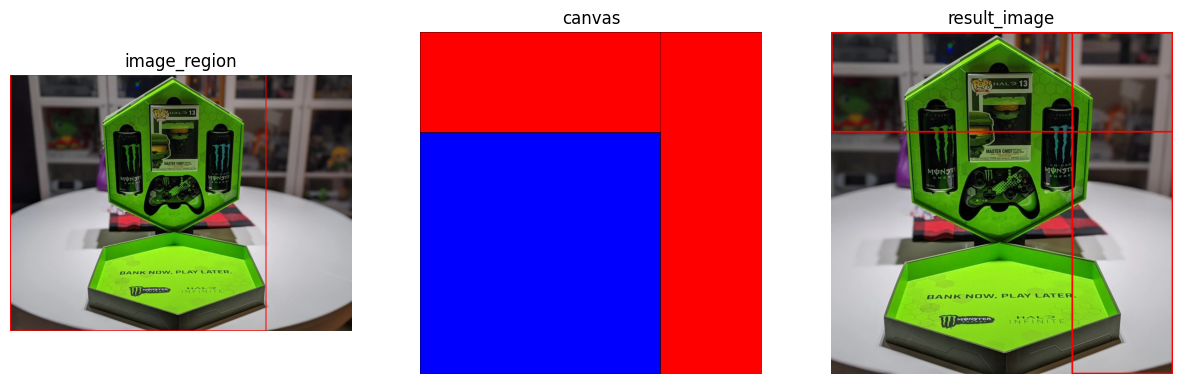

image: ../input/ad_3.webp, caption: Don't stop play


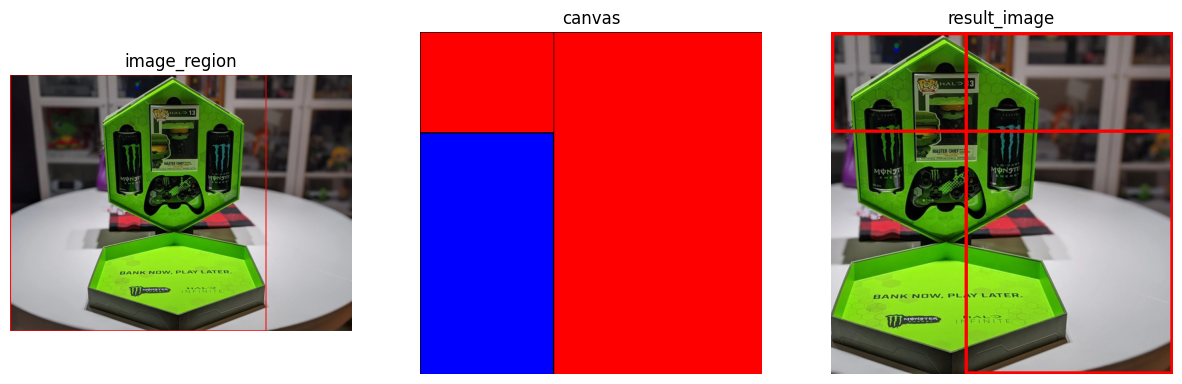

image: ../input/ad_3.webp, caption: Don't stop play


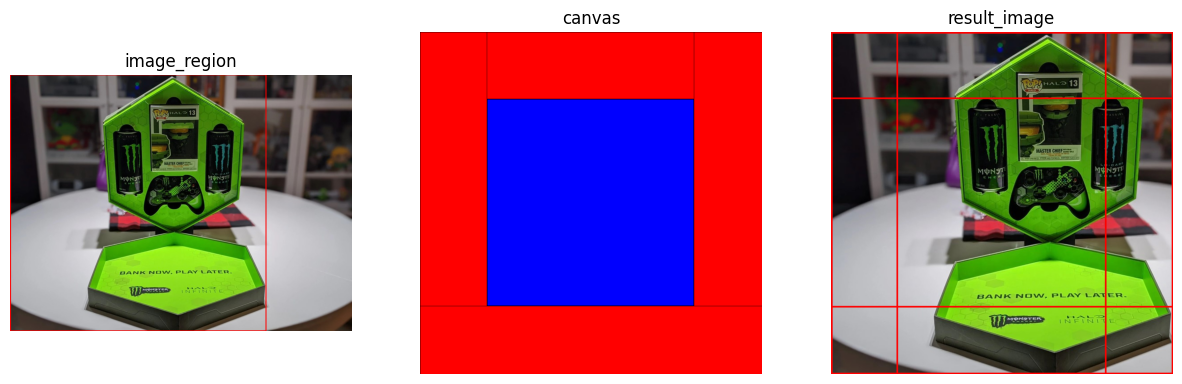

image: ../input/ad_3.webp, caption: Drink more, Drink better


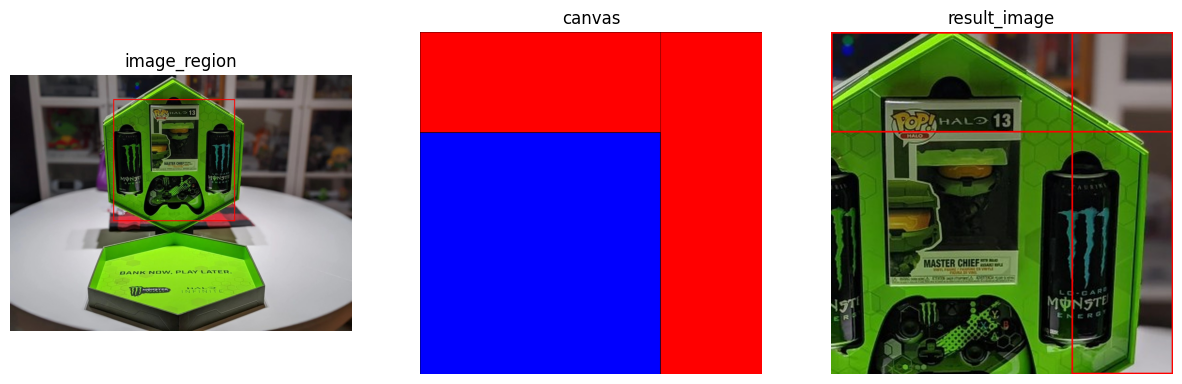

image: ../input/ad_3.webp, caption: Drink more, Drink better


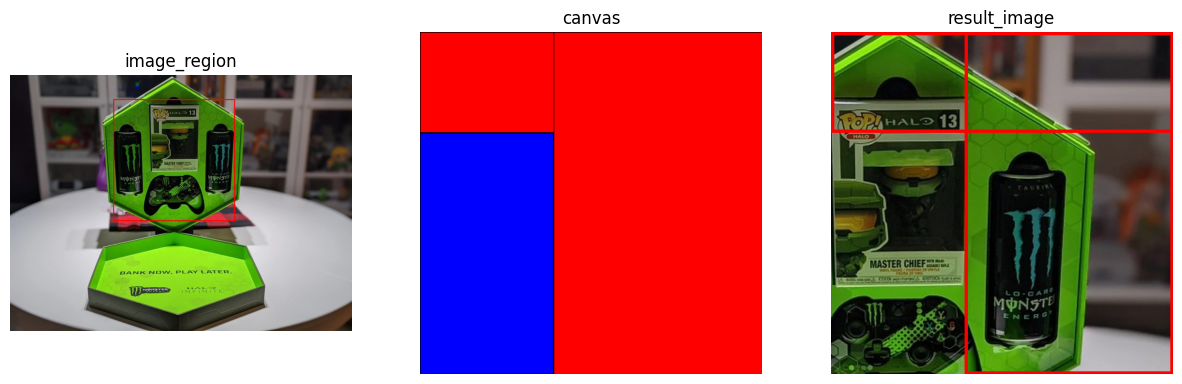

image: ../input/ad_3.webp, caption: Drink more, Drink better


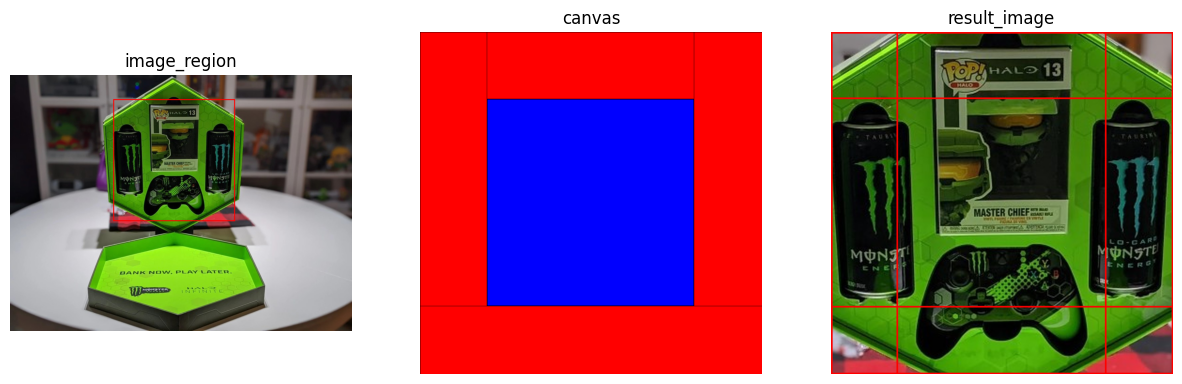

image: ../input/ad_3.webp, caption: Master Chief


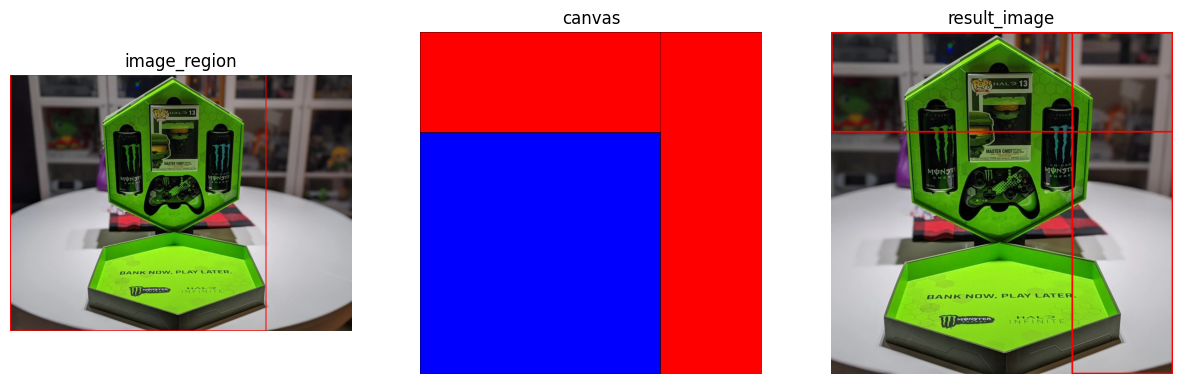

image: ../input/ad_3.webp, caption: Master Chief


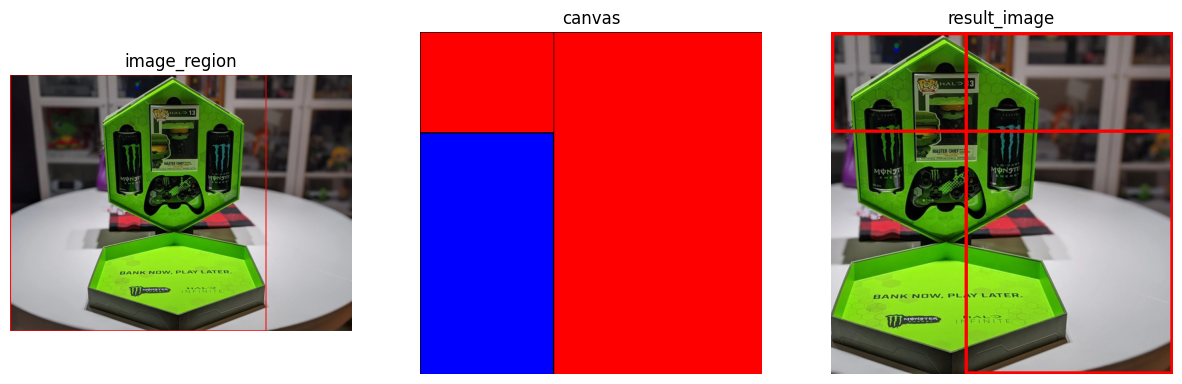

image: ../input/ad_3.webp, caption: Master Chief


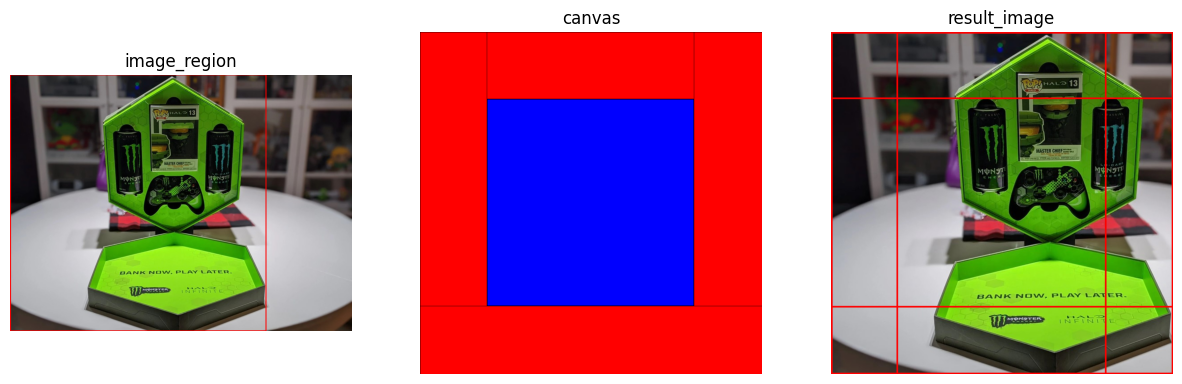

In [4]:
# iterate over the input images,captions and canvas_templates
for i, image_path in enumerate(input_images_list):
    for image_caption in captions[i]:
        for canvas_template in canvas_templates:
            
            # retrieve the the bb with RoI and the image representing it
            image_region, bb = florence_inference_region(image_path, image_caption)

            # get the maximal rectangle and the window of the canvas
            canvas_size = canvas_template.canvas_size
            elements = canvas_template.elements
            top_left, bottom_right = maximal_rectangle(canvas_size, elements)
            window = (top_left[0], top_left[1], bottom_right[0], bottom_right[1])

            # a representation of the canvas with the elements
            canvas = Image.new("RGB", canvas_size[1], "white")
            draw = ImageDraw.Draw(canvas)
            for i, element in enumerate(elements):
                draw.rectangle(element, outline="black", fill="red")
            draw.rectangle([top_left, bottom_right], outline="black", fill="blue")

            # resize and reposition the image in the canvas according to the bb and window
            result_image = resize_and_reposition(image_path, bb, window, canvas_size[1])
            # draw the elements for ilustration purposes
            draw = ImageDraw.Draw(result_image)
            for i, element in enumerate(elements):
                draw.rectangle(element, outline="red", width=5)

            print(f"image: {image_path}, caption: {image_caption}")
            # show image_region, canvas and result_image in a single row
            fig, ax = plt.subplots(1, 3, figsize=(15, 5))
            ax[0].imshow(image_region)
            ax[0].set_title("image_region")
            ax[1].imshow(canvas)
            ax[1].set_title("canvas")
            ax[2].imshow(result_image)
            ax[2].set_title("result_image")
            for a in ax:
                a.axis("off")
            plt.show()